In [ ]:
!pip install torch numpy matplotlib scikit-learn

In [ ]:
text = """
Malaria is a life-threatening disease caused by parasites transmitted to people
through the bites of infected mosquitoes. Early diagnosis and treatment reduce
disease transmission and prevent severe illness.
Mathematical models help predict disease spread and support public health planning.
Artificial intelligence can analyze patterns in epidemiological data.
"""

In [ ]:
tokens = text.lower().split()
vocab = {w:i for i,w in enumerate(sorted(set(tokens)))}
inv_vocab = {i:w for w,i in vocab.items()}

encoded = [vocab[w] for w in tokens]

print("Vocabulary size:", len(vocab))
print(encoded[:10])

Vocabulary size: 43
[21, 19, 0, 20, 10, 7, 5, 26, 41, 39]


In [ ]:
import torch
import torch.nn as nn

vocab_size = len(vocab)
embedding = nn.Embedding(vocab_size, 32)

sample = torch.tensor(encoded[:5])
print(embedding(sample))

tensor([[-0.6793, -1.2283, -0.4094,  1.2908,  0.4024,  0.9511, -0.3967, -0.7854,
          0.1109,  0.8838,  1.3767,  1.7630,  0.7041, -0.3432,  0.0749, -0.3076,
          0.4060, -2.2426, -1.1369,  0.8277,  0.1112,  2.1813,  0.2277, -0.0485,
          0.4950, -0.7398, -1.1585,  0.4587,  0.4912, -1.9712,  0.0175, -0.2181],
        [-1.1034, -0.2427,  0.3417,  0.8700, -0.7282, -0.6149, -1.7663,  1.9888,
         -0.7847, -0.6363, -0.4435,  0.0408, -0.9866, -0.8468,  0.1307,  1.5200,
         -0.0723, -0.4032, -1.2532, -0.4446, -0.0292, -1.4418,  0.8930,  0.5018,
          0.4608, -0.3463,  1.2090, -1.4890, -0.4984, -0.0145, -1.8753, -0.2362],
        [-1.4398,  0.1835,  0.4599,  0.9533,  0.6630, -0.7970,  0.1620,  0.8379,
          0.9737,  0.8463,  2.8294,  0.0768, -0.6176,  0.2827,  0.1310, -2.0273,
          0.0877,  0.6942,  0.7825, -1.0364,  1.2633, -0.1671,  2.4252,  2.1109,
          0.3753, -0.2053,  1.5114,  0.4473, -2.2274,  0.3398,  1.6053,  1.1282],
        [ 1.3617, -0.6605

In [ ]:
import torch.nn.functional as F

def attention(Q, K, V):
    scores = Q @ K.T / (Q.size(-1) ** 0.5)
    weights = F.softmax(scores, dim=-1)
    output = weights @ V
    return output

In [ ]:
Q = torch.randn(4, 32)
K = torch.randn(4, 32)
V = torch.randn(4, 32)

print(attention(Q, K, V))

tensor([[ 0.4377, -0.0525, -0.2722,  0.7505,  0.5753,  0.0463, -1.0744, -0.6216,
         -0.2085,  0.3483, -1.1744,  0.7081,  0.4669, -1.4997,  0.1489, -0.7843,
         -0.9542,  0.1878, -0.8113,  1.0556, -0.5364, -1.5678, -1.6051, -1.2183,
          1.2782,  0.0540, -0.7195,  0.1539,  0.2343,  0.5008, -1.1608,  0.4140],
        [ 0.4353,  0.1407,  0.2233,  0.6830,  0.5430, -0.1912, -1.0992, -0.0030,
          0.2419,  0.3466, -0.6550,  0.1244, -0.0254, -1.1639, -0.1209, -0.3122,
         -0.9209,  0.4582, -0.3666,  0.4726, -0.2815, -0.9827, -0.9015, -0.6906,
          0.9946,  0.2052, -0.6051, -0.0574,  0.3755,  0.2347, -0.8132,  0.3163],
        [ 0.0486,  0.2545, -0.0199,  0.6712,  0.7051, -0.2584, -1.2042, -0.3600,
          0.1594,  0.5158, -0.5844,  0.5380,  0.2842, -1.0398,  0.4642, -0.7936,
         -0.9579,  0.1843, -0.5774,  0.8353, -0.4388, -0.9392, -1.2427, -0.9117,
          1.2246,  0.2943, -0.7173,  0.1315,  0.2360,  0.3350, -0.7114,  0.6751],
        [ 0.3544,  0.1182

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class TinyTransformer(nn.Module):
    def __init__(self, vocab_size, d_model=32):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, d_model)

        self.Wq = nn.Linear(d_model, d_model)
        self.Wk = nn.Linear(d_model, d_model)
        self.Wv = nn.Linear(d_model, d_model)

        self.fc = nn.Linear(d_model, vocab_size)

    def forward(self, x):
        x = self.embedding(x)              # (N → N×d)

        Q = self.Wq(x)
        K = self.Wk(x)
        V = self.Wv(x)

        scores = Q @ K.T / (Q.size(-1) ** 0.5)
        weights = F.softmax(scores, dim=-1)

        attended = weights @ V

        output = self.fc(attended)

        return output

In [ ]:
# Convert encoded data into tensors
inputs = torch.tensor(encoded[:-1])
targets = torch.tensor(encoded[1:])

print(inputs.shape, targets.shape)

torch.Size([46]) torch.Size([46])


In [ ]:
vocab_size = len(vocab)

model = TinyTransformer(vocab_size)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

loss_fn = nn.CrossEntropyLoss()

In [ ]:
for epoch in range(60):

    optimizer.zero_grad()

    output = model(inputs)

    loss = loss_fn(output, targets)

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print("Epoch:", epoch, "Loss:", loss.item())

Epoch: 0 Loss: 3.75764799118042
Epoch: 10 Loss: 2.2528717517852783
Epoch: 20 Loss: 0.9678503274917603
Epoch: 30 Loss: 0.5756614208221436
Epoch: 40 Loss: 0.44347378611564636
Epoch: 50 Loss: 0.3939493000507355


In [ ]:
import math

perplexity = math.exp(loss.item())

print("Final Loss:", loss.item())
print("Perplexity:", perplexity)

Final Loss: 0.3793146312236786
Perplexity: 1.4612827285958159


In [ ]:
index = 3  # pick any position

input_word = inv_vocab[inputs[index].item()]

# Add a batch dimension to the input using .unsqueeze(0)
prediction = model(inputs[index].unsqueeze(0)).argmax().item()

predicted_word = inv_vocab[prediction]

print("Input word:", input_word)
print("Predicted next word:", predicted_word)

Input word: life-threatening
Predicted next word: artificial


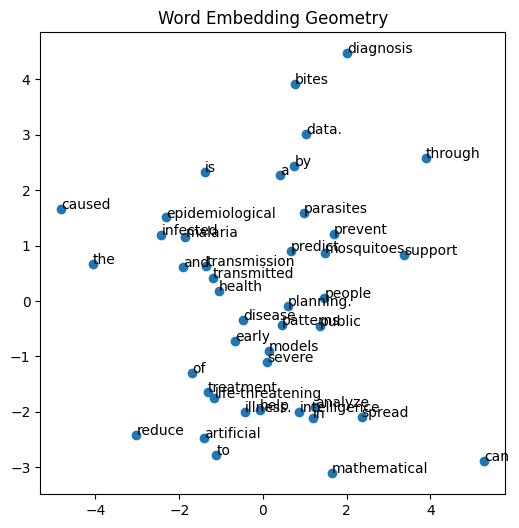

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

embeddings = model.embedding.weight.detach().numpy()

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(6,6))
plt.scatter(reduced[:,0], reduced[:,1])

for i, word in enumerate(vocab.keys()):
    plt.annotate(word, (reduced[i,0], reduced[i,1]))

plt.title("Word Embedding Geometry")
plt.show()